## PIL/Pillowで画像を合成する
PIL/Pillowのpasteメソッドを使うと画像に別の画像を張り付けることができます。<br>
画像の貼り付けは次の２つのjpgファイルを使います。

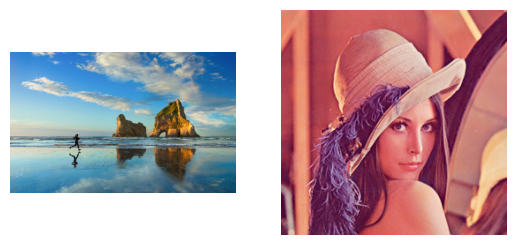

In [9]:
%matplotlib inline
from PIL import Image, ImageDraw, ImageFilter, ImageOps
from matplotlib import pyplot as plt

img1 = Image.open("data/img1.jpg")
img2 = Image.open("data/Lenna.jpg")

plt.subplot(121)
plt.axis('off')
plt.imshow(img1)

plt.subplot(122)
plt.axis('off')
plt.imshow(img2)
plt.show()

### 通常の貼り付け
ベース画像のpaste()メソッドの引数に貼り付ける画像と位置を指定します。<br>
位置はピクセル単位のタプルで指定し(0,0)がベース画像の左上です。<br>
省略すると左上になります。<br>

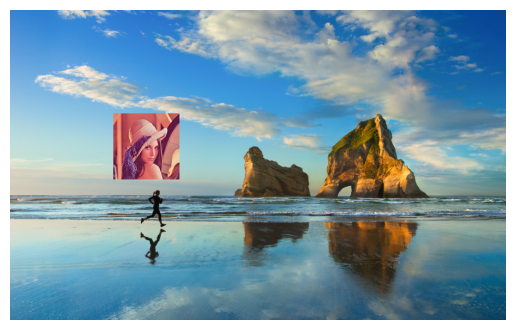

In [2]:
img1 = Image.open("data/img1.jpg")
img2 = Image.open("data/Lenna.jpg")

bg_img = img1.copy()

bg_img.paste(img2,(400,400))
plt.axis("off")
plt.imshow(bg_img)
plt.show()

### マスク画像を使った貼り付け
paste()メソッドの第三引数にマスク画像を指定すると、さまざまな形に切り抜いて張り付けることができます。マスク画像として使用できるのは、貼り付け画像と同じサイズで次の3種類のモードです。<br>

・1:1bit画像（二値画像）<br>
・L: 8bitグレースケール画像<br>
・RGBA: アルファチャンネルを持った画像<br>
    
ImageDrawモジュールで黒字に白の円を描画しマスク画像を生成します。

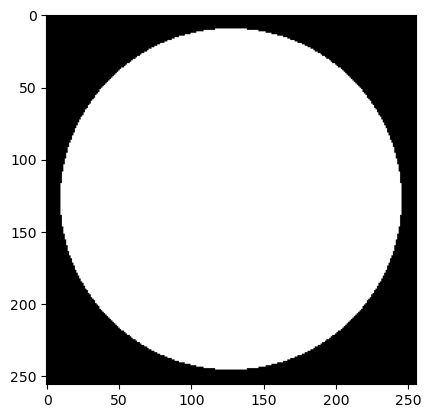

In [4]:
mask_img = Image.new("L", img2.size, 0)
draw = ImageDraw.Draw(mask_img)
draw.ellipse((10,10,245,245), fill=255)
plt.imshow(mask_img, cmap=plt.cm.gray)
plt.show()

この画像をマスク画像として貼り付け処理を行うと、貼り付け画像を円形にマスクできます。

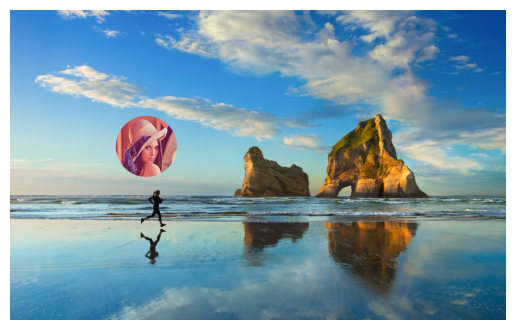

In [5]:
img1 = Image.open("data/img1.jpg")
img2 = Image.open("data/Lenna.jpg")
mask_img = Image.new("L", img2.size, 0)
draw = ImageDraw.Draw(mask_img)
draw.ellipse((10,10,245,245), fill=255)

bg_img = img1.copy()

bg_img.paste(img2,(400,400),mask_img)
plt.axis("off")
plt.imshow(bg_img)
plt.show()

マスク画像を準備すれば任意の形状で貼り付けられます。<br>
 ImageOpsモジュールの画像をネガポジ反転する関数invert()を使ってマスク画像を作成します。

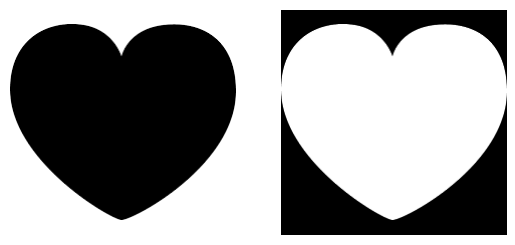

In [6]:

img = Image.open('data/heart.png').convert('RGB')
img_invert = ImageOps.invert(img)
img_invert.save('data/heart_invert.png')

plt.subplot(121)
plt.axis('off')
plt.imshow(img,cmap=plt.cm.gray)

plt.subplot(122)
plt.axis('off')
plt.imshow(img_invert, cmap=plt.cm.gray)
plt.show()

このマスク画像を使って画像を張り付けます。

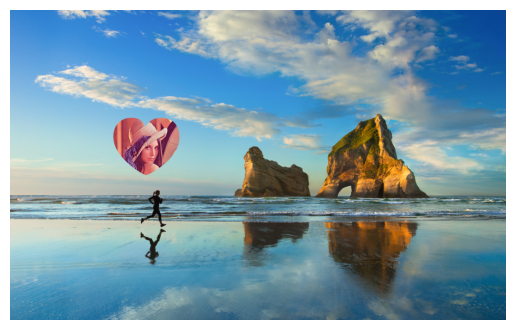

In [7]:
img1 = Image.open("data/img1.jpg")
img2 = Image.open("data/Lenna.jpg")
mask_img = Image.open('data/heart_invert.png').resize(img2.size).convert('L')

bg_img = img1.copy()

bg_img.paste(img2,(400,400),mask_img)
plt.axis("off")
plt.imshow(bg_img)
plt.show()

マスク画像をImageFilterモジュールを使って境界をぼかして貼り付けることができます。

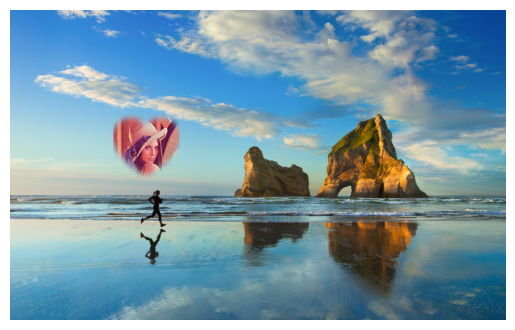

In [8]:
mask_im_blur = mask_img.filter(ImageFilter.GaussianBlur(10))

bg_img = img1.copy()
bg_img.paste(img2, (400, 400), mask_im_blur)
plt.axis("off")
plt.imshow(bg_img)
plt.show()